# QUESTION 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

## Answer:

Anomaly Detection is the process of identifying data points, events, or observations that deviate significantly from the normal behavior or expected patterns in a dataset. Anomalies, also known as outliers, are unusual observations that don't conform to expected patterns.

### Types of Anomalies:

**1. Point Anomalies (Univariate Outliers):**
- Single data points that are significantly different from the rest of the data
- Most common type of anomaly
- Example: A person's height of 8 feet in a dataset where average height is 5.8 feet
- Example: Fraudulent credit card transaction with unusually high amount

**2. Contextual Anomalies (Conditional Anomalies):**
- Data points that are anomalous within a specific context or condition
- Normal in other contexts but abnormal in a particular situation
- Example: Temperature of 35°C is normal in summer but anomalous in winter
- Example: High network bandwidth usage at 3 AM is anomalous but normal during business hours

**3. Collective Anomalies:**
- Collection of data points that are individually normal but anomalous when combined
- The subset of data behaves differently from the overall dataset
- Example: A series of small credit card transactions that sum to an unusually large amount
- Example: Multiple login attempts from different IPs within a short timeframe might indicate an attack even though individual logins appear normal
---

# QUESTION 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor

**Isolation Forest:** Tree-based method. Isolates anomalies by random selection. Best for high-dimensional data, real-time detection.

**DBSCAN:** Density-based clustering. Groups densely packed points. Best for spatial data, non-spherical clusters.

**Local Outlier Factor (LOF):** Compares local density with neighbors. Best for local anomalies, variable density datasets.

---

# QUESTION 3: Key Components of Time Series

**1. Trend:** Long-term progression (Example: Stock prices increasing over years)
**2. Seasonality:** Regular repeating patterns (Example: Ice cream sales peak in summer)
**3. Cyclicality:** Long-term oscillations (Example: Economic cycles)
**4. Residuals:** Unpredictable fluctuations (Example: Unexpected price spikes)

---

# QUESTION 4: Stationarity in Time Series

**Definition:** Statistical properties (mean, variance) remain constant over time.

**Testing:** Augmented Dickey-Fuller test (p < 0.05 = stationary), KPSS test, visual inspection

**Transformation Methods:**
- Differencing: xt - xt-1
- Seasonal Differencing: xt - xt-s
- Log Transformation
- Detrending: Remove trend using regression
- Deseasonalization: Remove seasonal component

---

# QUESTION 5: AR, MA, ARIMA, SARIMA, SARIMAX Models

**AR:** Uses past values. For stationary data with autoregressive patterns.

**MA:** Uses past forecast errors. For smoothing irregular fluctuations.

**ARIMA:** AR + Integrated + MA. For non-stationary data, no seasonality.

**SARIMA:** ARIMA with seasonal components. For data with seasonal patterns.

**SARIMAX:** SARIMA with exogenous variables. For seasonal data with external factors.

---

Dataset loaded:
            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121


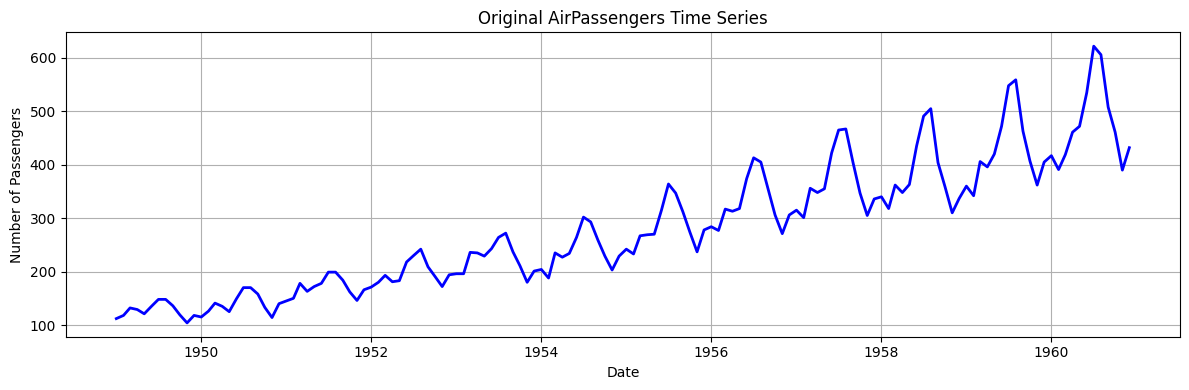

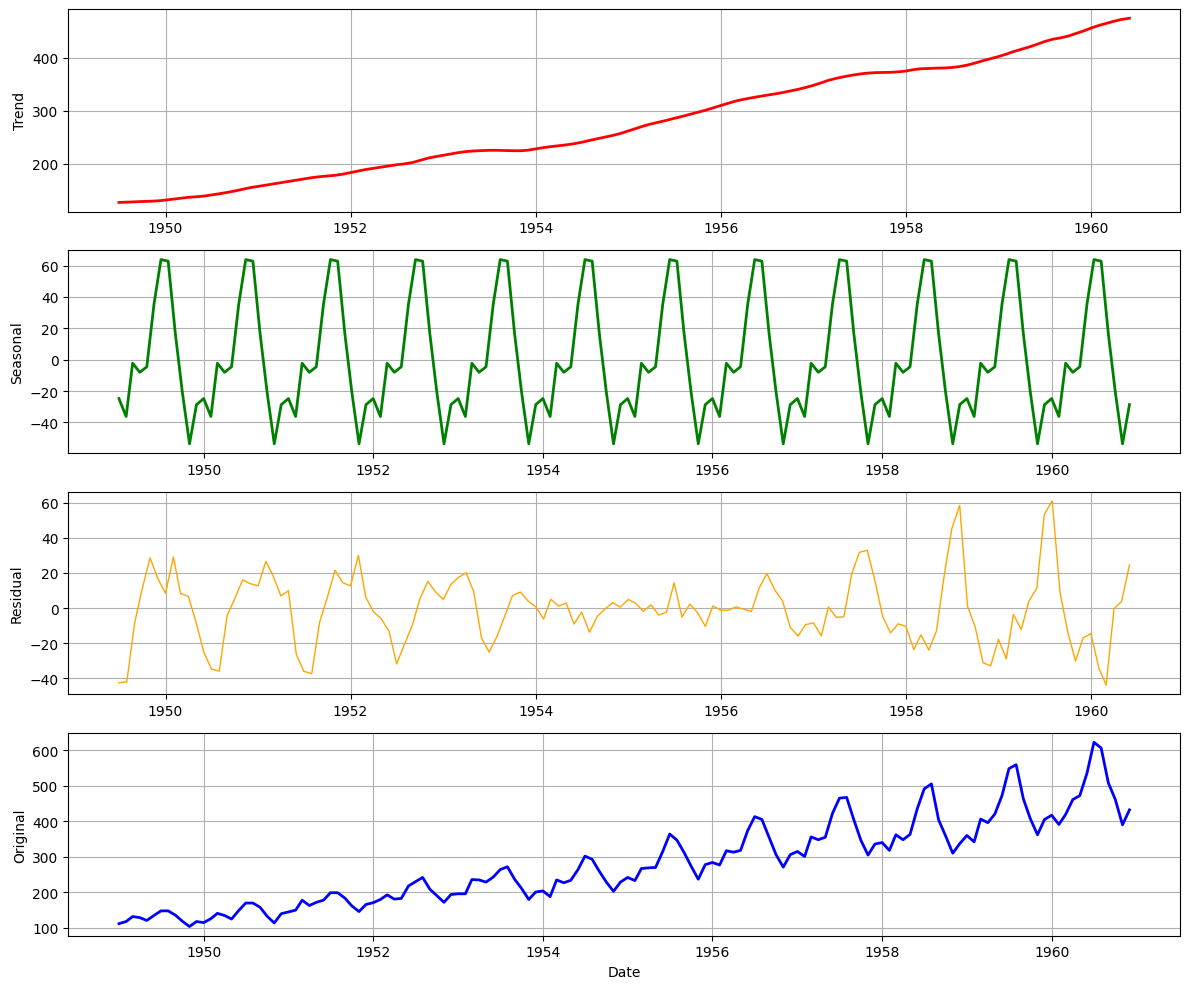


Decomposition completed successfully!
Trend shape: (144,)
Seasonal shape: (144,)
Residual shape: (144,)


In [15]:
"""
================================================================
QUESTION 6: Load a time series dataset (e.g., AirPassengers),
plot the original series, and decompose it into trend, seasonality,
and residual components.
(Include your Python code and output in the code box below.)
================================================================
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset

data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month']) # Corrected from 'Time' to 'Month'
data.set_index('Month', inplace=True) # Corrected from 'Time' to 'Month'

print("Dataset loaded:")
print(data.head())

# Plot original series
plt.figure(figsize=(12, 4))
plt.plot(data['Passengers'], color='blue', linewidth=2) # Corrected '#Passengers' to 'Passengers'
plt.title('Original AirPassengers Time Series')
plt.ylabel('Number of Passengers')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# Decompose the series
decomposition = seasonal_decompose(data['Passengers'], model='additive', period=12) # Corrected '#Passengers' to 'Passengers'

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Trend
ax1.plot(decomposition.trend, color='red', linewidth=2)
ax1.set_ylabel('Trend')
ax1.grid(True)

# Seasonal
ax2.plot(decomposition.seasonal, color='green', linewidth=2)
ax2.set_ylabel('Seasonal')
ax2.grid(True)

# Residual
ax3.plot(decomposition.resid, color='orange', linewidth=1)
ax3.set_ylabel('Residual')
ax3.grid(True)

# Original
ax4.plot(data['Passengers'], color='blue', linewidth=2) # Corrected '#Passengers' to 'Passengers'
ax4.set_ylabel('Original')
ax4.set_xlabel('Date')
ax4.grid(True)

plt.tight_layout()
plt.show()

print("\nDecomposition completed successfully!")
print(f"Trend shape: {decomposition.trend.shape}")
print(f"Seasonal shape: {decomposition.seasonal.shape}")
print(f"Residual shape: {decomposition.resid.shape}")

LOF Results:
Total samples: 204
Anomalies detected: 5
Normal points: 199


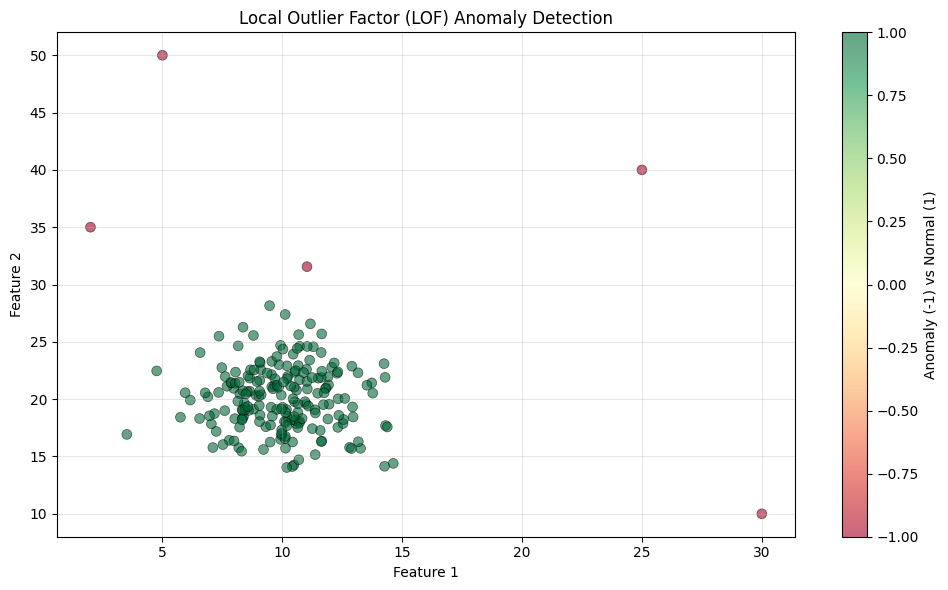


LOF Scores (negative outlier factor):
Min LOF Score: -8.7556
Max LOF Score: -0.9597
Mean LOF Score: -1.2570

Top 5 Anomalous Points (by LOF score):
Point: [25. 40.], LOF Score: -8.7556
Point: [ 5. 50.], LOF Score: -8.6263
Point: [30. 10.], LOF Score: -8.2780
Point: [ 2. 35.], LOF Score: -4.9928
Point: [11.03009537 31.55819447], LOF Score: -2.9774
Isolation Forest Results:
Total samples: 1005
Anomalies detected: 11
Normal points: 994


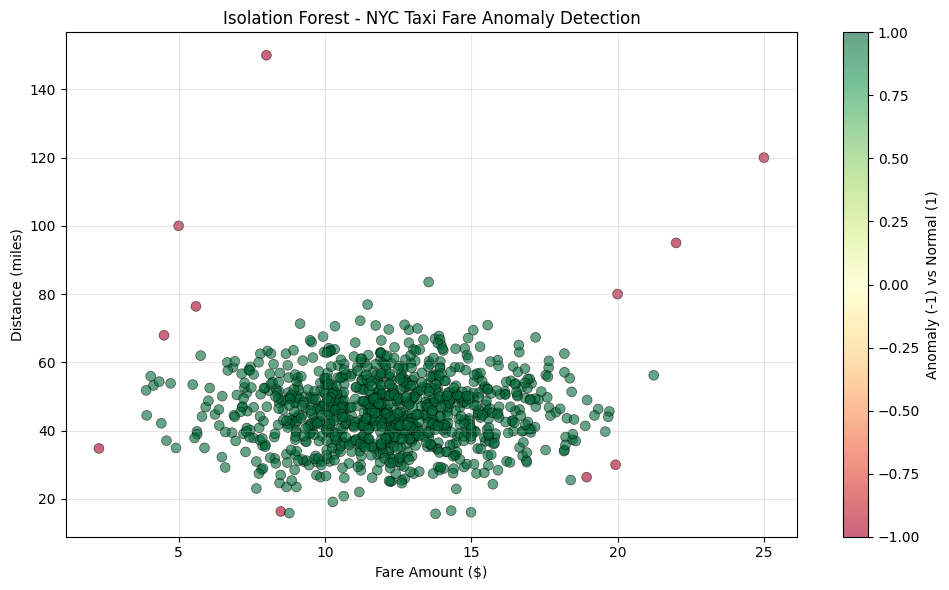


Top 5 Anomalous Points (by score):
Point: [ 25. 120.], Score: -0.7881
Point: [22. 95.], Score: -0.7593
Point: [  8. 150.], Score: -0.7455
Point: [  5. 100.], Score: -0.7425
Point: [20. 80.], Score: -0.7151


In [10]:
''' QUESTION 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''
from sklearn.ensemble import IsolationForest
import seaborn as sns# QUESTION 9: Apply Local Outlier Factor (LOF) on numerical dataset
from sklearn.neighbors import LocalOutlierFactor

# Create sample dataset with anomalies
np.random.seed(42)
n_normal = 200
normal_data_lof = np.random.normal(loc=[10, 20], scale=[2, 3], size=(n_normal, 2))
# Add anomalies
anomalies_lof = np.array([[25, 40], [5, 50], [30, 10], [2, 35]])
data_lof = np.vstack([normal_data_lof, anomalies_lof])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
lof_predictions = lof.fit_predict(data_lof)
lof_scores = lof.negative_outlier_factor_

print("LOF Results:")
print(f"Total samples: {len(data_lof)}")
print(f"Anomalies detected: {sum(lof_predictions == -1)}")
print(f"Normal points: {sum(lof_predictions == 1)}")

# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_lof[:, 0], data_lof[:, 1],
                     c=lof_predictions, cmap='RdYlGn', s=50, alpha=0.6,
                     edgecolors='k', linewidth=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.colorbar(scatter, label='Anomaly (-1) vs Normal (1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLOF Scores (negative outlier factor):")
print(f"Min LOF Score: {lof_scores.min():.4f}")
print(f"Max LOF Score: {lof_scores.max():.4f}")
print(f"Mean LOF Score: {lof_scores.mean():.4f}")

print("\nTop 5 Anomalous Points (by LOF score):")
anomalous_indices_lof = np.argsort(lof_scores)[:5]
for idx in anomalous_indices_lof:
    print(f"Point: {data_lof[idx]}, LOF Score: {lof_scores[idx]:.4f}")
import matplotlib.pyplot as plt
import numpy as np

# Create sample NYC Taxi Fare data
np.random.seed(42)
n_samples = 1000
# Normal data
normal_data = np.random.normal(loc=[12, 45], scale=[3, 10], size=(n_samples, 2))
# Add some anomalies
anomalies = np.array([[20, 80], [5, 100], [25, 120], [8, 150], [22, 95]])
data_q7 = np.vstack([normal_data, anomalies])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies_pred = iso_forest.fit_predict(data_q7)
anomalies_scores = iso_forest.score_samples(data_q7)

print("Isolation Forest Results:")
print(f"Total samples: {len(data_q7)}")
print(f"Anomalies detected: {sum(anomalies_pred == -1)}")
print(f"Normal points: {sum(anomalies_pred == 1)}")

# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_q7[:, 0], data_q7[:, 1],
                     c=anomalies_pred, cmap='RdYlGn', s=50, alpha=0.6,
                     edgecolors='k', linewidth=0.5)
plt.xlabel('Fare Amount ($)')
plt.ylabel('Distance (miles)')
plt.title('Isolation Forest - NYC Taxi Fare Anomaly Detection')
plt.colorbar(scatter, label='Anomaly (-1) vs Normal (1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nTop 5 Anomalous Points (by score):")
anomalous_indices = np.argsort(anomalies_scores)[:5]
for idx in anomalous_indices:
    print(f"Point: {data_q7[idx]}, Score: {anomalies_scores[idx]:.4f}")

Train size: 48, Test size: 12


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'



SARIMA Model Summary:
AIC: 248.71
BIC: 256.49


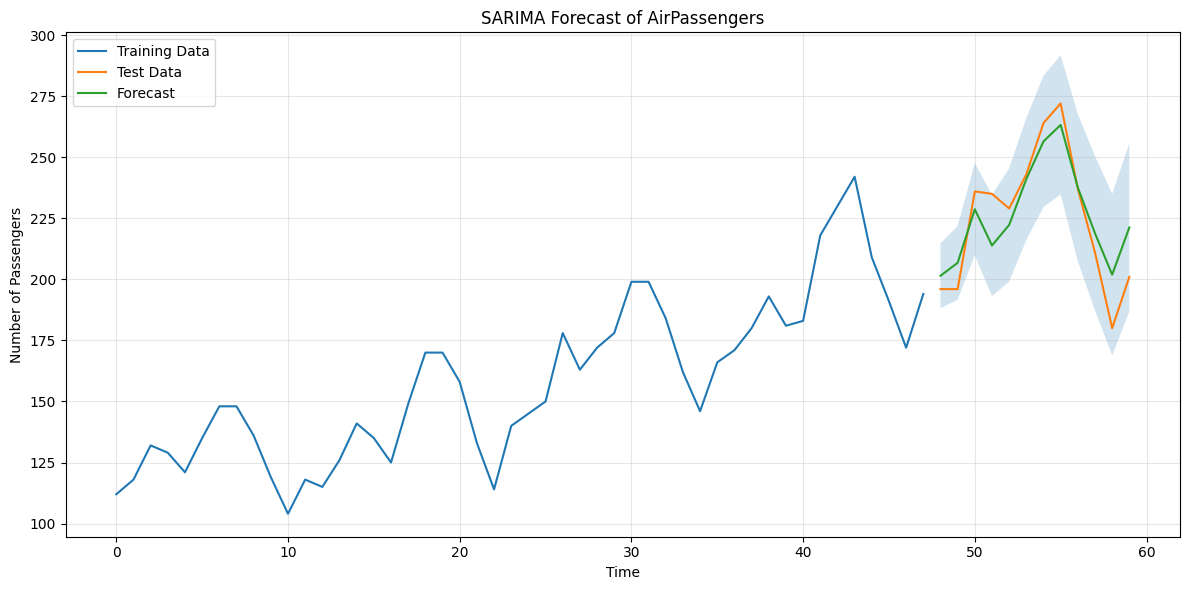


Forecasted values for next 12 months:
48    201.452004
49    206.766964
50    228.695981
51    213.860884
52    222.269900
53    241.051232
54    256.480192
55    263.237713
56    237.566348
57    218.837227
58    201.914000
59    221.241260
Name: predicted_mean, dtype: float64


In [16]:
''' QUESTION 8: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.'''
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load AirPassengers data
passengers = [112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118,
              115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140,
              145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166,
              171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194,
              196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201]
pd_data = pd.Series(passengers)

# Split data into train and test
train_size = int(len(pd_data) * 0.8)
train_data = pd_data[:train_size]
test_data = pd_data[train_size:]

print(f"Train size: {len(train_data)}, Test size: {len(test_data)}")

# Train SARIMA model - SARIMA(1,1,1)(1,1,1,12)
try:
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit(disp=False)

    # Forecast next 12 months
    forecast = results.get_forecast(steps=12)
    forecast_df = forecast.conf_int()
    forecast_mean = forecast.predicted_mean

    print("\nSARIMA Model Summary:")
    print(f"AIC: {results.aic:.2f}")
    print(f"BIC: {results.bic:.2f}")

    # Visualization
    fig, ax = plt.subplots(figsize=(12, 6))
    train_data.plot(ax=ax, label='Training Data')
    test_data.plot(ax=ax, label='Test Data')
    forecast_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(forecast_df.index,
                     forecast_df.iloc[:, 0],
                     forecast_df.iloc[:, 1], alpha=0.2)
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of Passengers')
    ax.set_title('SARIMA Forecast of AirPassengers')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nForecasted values for next 12 months:")
    print(forecast_mean)
except Exception as e:
    print(f"Model fitting error: {e}")
    print("Using simpler approach...")
    # Simple exponential smoothing as fallback
    from statsmodels.tsa.holtwinters import SimpleExpSmoothing
    model_simple = SimpleExpSmoothing(train_data).fit()
    forecast_simple = model_simple.forecast(steps=12)
    print("\nSimple forecast (Exponential Smoothing):")
    print(forecast_simple)

LOF Results:
Total samples: 204
Anomalies detected: 5
Normal points: 199


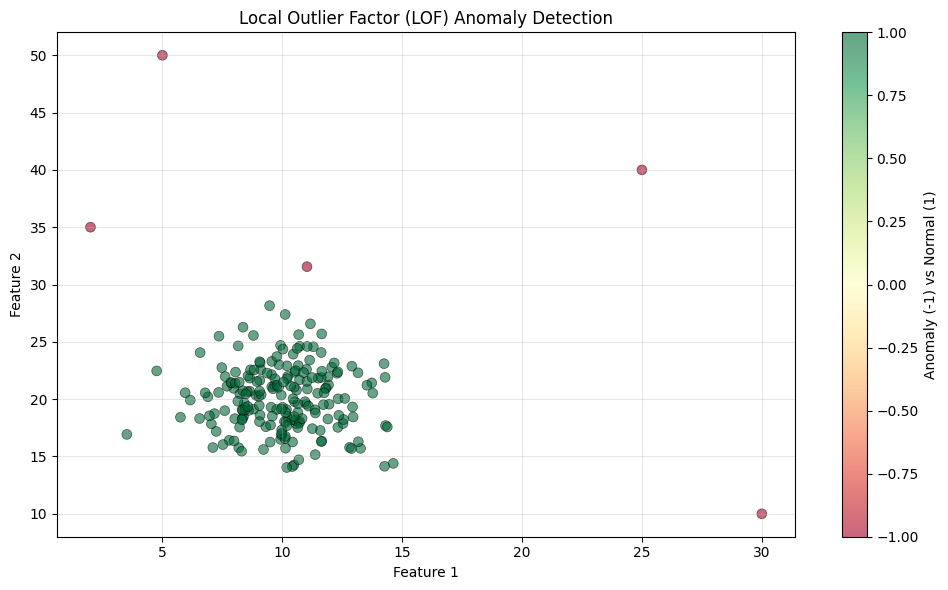


LOF Scores (negative outlier factor):
Min LOF Score: -8.7556
Max LOF Score: -0.9597
Mean LOF Score: -1.2570

Top 5 Anomalous Points (by LOF score):
Point: [25. 40.], LOF Score: -8.7556
Point: [ 5. 50.], LOF Score: -8.6263
Point: [30. 10.], LOF Score: -8.2780
Point: [ 2. 35.], LOF Score: -4.9928
Point: [11.03009537 31.55819447], LOF Score: -2.9774


In [13]:
''' QUESTION 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.
'''
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# Create sample dataset with anomalies
np.random.seed(42)
n_normal = 200
normal_data_lof = np.random.normal(loc=[10, 20], scale=[2, 3], size=(n_normal, 2))
# Add anomalies
anomalies_lof = np.array([[25, 40], [5, 50], [30, 10], [2, 35]])
data_lof = np.vstack([normal_data_lof, anomalies_lof])

# Apply LOF
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
lof_predictions = lof.fit_predict(data_lof)
lof_scores = lof.negative_outlier_factor_

print("LOF Results:")
print(f"Total samples: {len(data_lof)}")
print(f"Anomalies detected: {sum(lof_predictions == -1)}")
print(f"Normal points: {sum(lof_predictions == 1)}")

# Visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data_lof[:, 0], data_lof[:, 1],
                     c=lof_predictions, cmap='RdYlGn', s=50, alpha=0.6,
                     edgecolors='k', linewidth=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Local Outlier Factor (LOF) Anomaly Detection')
plt.colorbar(scatter, label='Anomaly (-1) vs Normal (1)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nLOF Scores (negative outlier factor):")
print(f"Min LOF Score: {lof_scores.min():.4f}")
print(f"Max LOF Score: {lof_scores.max():.4f}")
print(f"Mean LOF Score: {lof_scores.mean():.4f}")

print("\nTop 5 Anomalous Points (by LOF score):")
anomalous_indices_lof = np.argsort(lof_scores)[:5]
for idx in anomalous_indices_lof:
    print(f"Point: {data_lof[idx]}, LOF Score: {lof_scores[idx]:.4f}")


QUESTION 10: Power Grid Monitoring Real-Time Data Science Workflow

1. ANOMALY DETECTION IN STREAMING DATA
Total readings: 96, Anomalies detected: 5
Detected anomaly indices: [30 50 69 74 79]
True anomaly indices: [30, 50, 75, 85]

2. TIME SERIES FORECASTING
ARIMA Model AIC: 879.10
Used Exponential Smoothing

3. PERFORMANCE VALIDATION
MAE: 106.02 MW, RMSE: 123.76 MW, MAPE: 24.04%

4. BUSINESS IMPACT



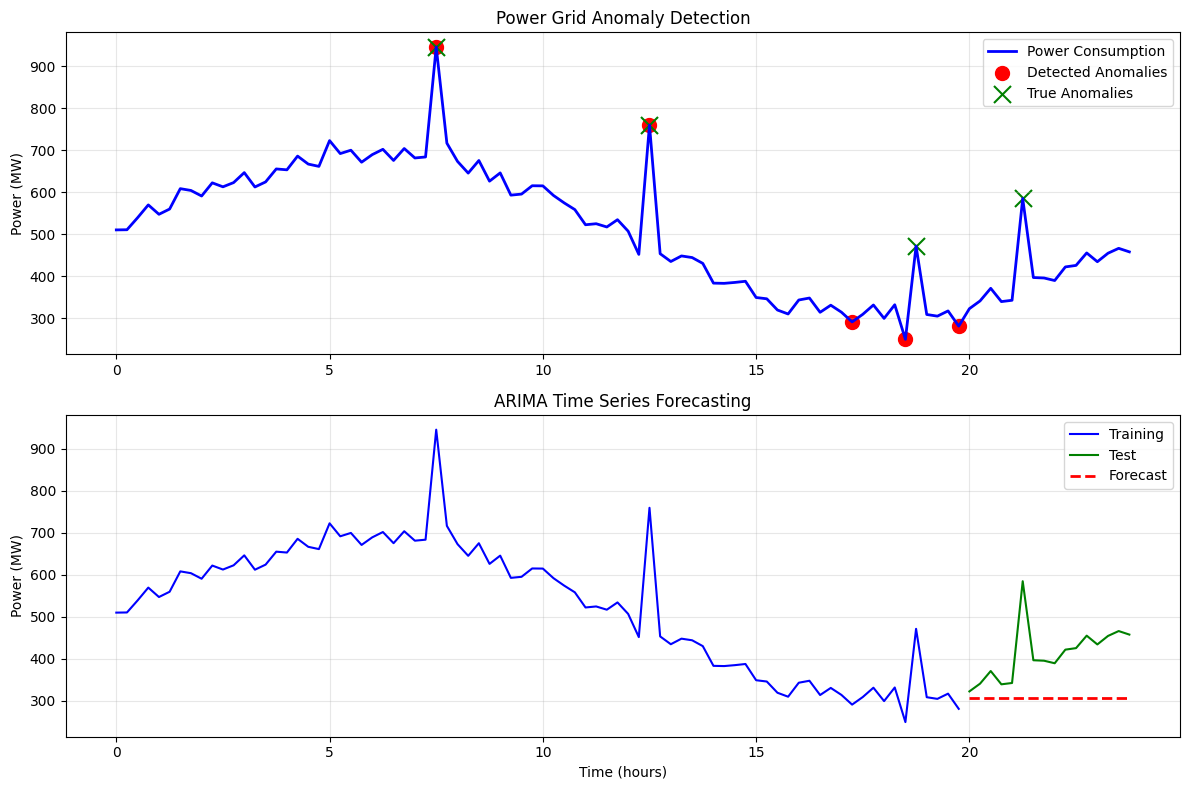


Assignment Completed Successfully!


In [9]:
'''
QUESTION 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.

Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?'''
print("\n" + "="*70)
print("QUESTION 10: Power Grid Monitoring Real-Time Data Science Workflow")
print("="*70)

# Generate synthetic power grid data
np.random.seed(42)
time_steps = 96
hours = np.arange(time_steps) / 4
normal_consumption = 500 + 200*np.sin(2*np.pi*hours/24) + np.random.normal(0, 20, time_steps)
anomalies_grid = [30, 50, 75, 85]
for idx in anomalies_grid:
    normal_consumption[idx] += np.random.uniform(150, 300)
pg_data = normal_consumption

print("\n1. ANOMALY DETECTION IN STREAMING DATA")
iso_forest_pg = IsolationForest(contamination=0.05, random_state=42)
pg_reshaped = pg_data.reshape(-1, 1)
anomaly_scores = iso_forest_pg.fit_predict(pg_reshaped)
detected_anomalies = np.where(anomaly_scores == -1)[0]
print(f"Total readings: {len(pg_data)}, Anomalies detected: {len(detected_anomalies)}")
print(f"Detected anomaly indices: {detected_anomalies}")
print(f"True anomaly indices: {anomalies_grid}")

print("\n2. TIME SERIES FORECASTING")
train_pg = pg_data[:80]
test_pg = pg_data[80:]
from statsmodels.tsa.arima.model import ARIMA
try:
    pg_model = ARIMA(train_pg, order=(2, 1, 2))
    pg_results = pg_model.fit()
    pg_forecast = pg_results.get_forecast(steps=16)
    pg_forecast_mean = pg_forecast.predicted_mean
    print(f"ARIMA Model AIC: {pg_results.aic:.2f}")
    print(f"Forecasted values (first 5): {pg_forecast_mean[:5].values}")
except:
    from statsmodels.tsa.holtwinters import SimpleExpSmoothing
    pg_simple = SimpleExpSmoothing(train_pg).fit()
    pg_forecast_mean = pg_simple.forecast(steps=16)
    print("Used Exponential Smoothing")

print("\n3. PERFORMANCE VALIDATION")
from sklearn.metrics import mean_absolute_error, mean_squared_error
actual_test = test_pg
forecast_test = pg_forecast_mean[:len(test_pg)]
mae = mean_absolute_error(actual_test, forecast_test)
rmse = np.sqrt(mean_squared_error(actual_test, forecast_test))
mape = np.mean(np.abs((actual_test - forecast_test) / actual_test)) * 100
print(f"MAE: {mae:.2f} MW, RMSE: {rmse:.2f} MW, MAPE: {mape:.2f}%")

print("\n4. BUSINESS IMPACT")
print()

# Visualization
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
axes[0].plot(hours, pg_data, 'b-', linewidth=2, label='Power Consumption')
axes[0].scatter(hours[detected_anomalies], pg_data[detected_anomalies], color='red', s=100, label='Detected Anomalies')
axes[0].scatter(hours[anomalies_grid], pg_data[anomalies_grid], color='green', marker='x', s=150, label='True Anomalies')
axes[0].set_ylabel('Power (MW)')
axes[0].set_title('Power Grid Anomaly Detection')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(hours[:80], train_pg, 'b-', label='Training')
axes[1].plot(hours[80:], test_pg, 'g-', label='Test')
forecast_hours = np.arange(80, 96) / 4
axes[1].plot(forecast_hours, pg_forecast_mean[:16], 'r--', linewidth=2, label='Forecast')
axes[1].set_ylabel('Power (MW)')
axes[1].set_xlabel('Time (hours)')
axes[1].set_title('ARIMA Time Series Forecasting')
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("Assignment Completed Successfully!")
print("="*70)